## <b> NB03 - Rankings </b>

#### Now that I have decided on my cities and gotten their raininess data, I will analyse which is the rainiest. 

#### I will do this by:
1) Ranking the cities from 1-5 based on their raininess every day between 2021-01-01 and 2024-01-01
2) Rank the cities on how many times they have ranked number 1 in the raininess charts
3) See which city is the rainiest of them all

In [66]:
import pandas as pd
import os
import json
import requests
import numpy as np

from functions import *

from lets_plot import *
LetsPlot.setup_html()

from lets_plot.mapping import *

from IPython.display import Image

In [3]:
df = pd.read_csv('/files/ds105a-2024-w06-summative-deyavuz/data/historical_city_rain_data.csv')

df['raininess_rank'] = df.groupby('date')['raininess'].rank(ascending=False)

df = df.sort_values(['date', 'raininess_rank'])

print(df)

     country     city        date  raininess  raininess_rank
3288      US  Seattle  2021-01-01       12.5             1.0
0         GB   London  2021-01-01        0.4             2.0
4384      NO     Oslo  2021-01-01        0.1             3.0
1096      JP    Kyoto  2021-01-01        0.0             4.5
2192      DE   Munich  2021-01-01        0.0             4.5
...      ...      ...         ...        ...             ...
1095      GB   London  2024-01-01       10.5             1.0
2191      JP    Kyoto  2024-01-01        2.9             2.0
3287      DE   Munich  2024-01-01        0.2             3.0
4383      US  Seattle  2024-01-01        0.0             4.5
5479      NO     Oslo  2024-01-01        0.0             4.5

[5480 rows x 5 columns]


In [4]:
city_rank_counts = df[df['raininess_rank'] == 1].groupby('city').size().reset_index(name='number_of_1_ranks')

city_rank_counts = city_rank_counts.sort_values(by='number_of_1_ranks', ascending=False)

print(city_rank_counts)

      city  number_of_1_ranks
0    Kyoto                283
4  Seattle                254
2   Munich                204
1   London                171
3     Oslo                150


In [12]:
city_rank_counts.to_csv('../data/city_rank_counts.csv', index=False)

In [18]:
df = pd.read_csv('../data/city_rank_counts.csv')
df['explode'] = [0.2 if c == 'London' else 0.0 for c in df['city']]
df

,city,number_of_1_ranks,explode
0,Kyoto,283,0.0
1,Seattle,254,0.0
2,Munich,204,0.0
3,London,171,0.2
4,Oslo,150,0.0


In [67]:
plot = (ggplot(df) + \
    geom_pie(aes(fill=as_discrete('city', order_by='number_of_1_ranks'), weight='number_of_1_ranks', explode='explode'),
             size=25,
             labels=layer_labels().line('@city').size(14)) + \
    ggsize(500, 400) + \
    scale_fill_gradient(low='#e0218a', high='light_pink') + \
    theme_void() + \
    theme(legend_position='none'))

In [70]:
ggsave(plot, filename='no_of_1_plot.png', path='../figures')

'/files/ds105a-2024-w06-summative-deyavuz/figures/no_of_1_plot.png'

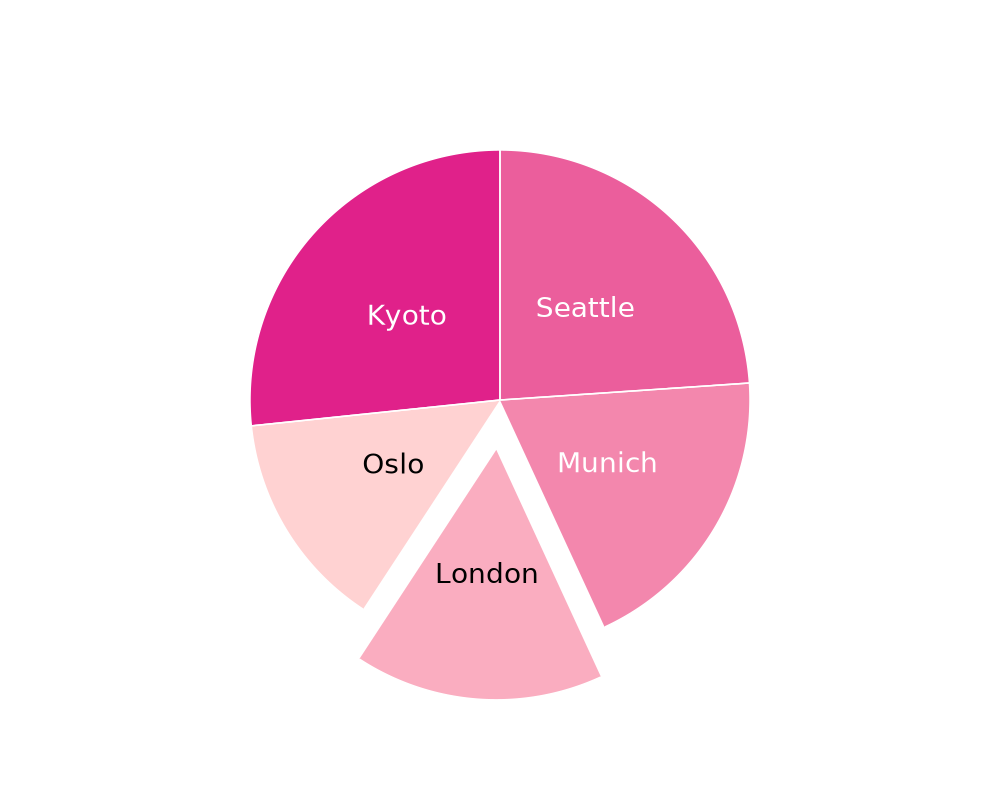

In [72]:
Image(filename='../figures/no_of_1_plot.png') 

Based on this, we can conclude that London is <b> NOT </b> the rainiest city of them all - and potentially, not as rainy as the movies make it out to be, as it ranked 4th most rainy city out of 5 movie-featured rainy cities. 